In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import cpi

pd.options.display.float_format = '{:.2f}'.format

In [51]:
df = pd.read_csv(r"C:\Users\felip\Documents\ST CLAIR COLLEGE\First Semester\ANALYTI TOOLS & DECISN MAKING\Project 1\dataset_4.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18824 entries, 0 to 18823
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Period                 18824 non-null  object 
 1   Activity               18824 non-null  object 
 2   Source                 18824 non-null  object 
 3   Destination            18821 non-null  object 
 4   Energy (MW.h)          18824 non-null  float64
 5   Total Value (CAN$)     18824 non-null  float64
 6   Price (CAN$/MW.h)      18824 non-null  float64
 7   Prime Minister         18824 non-null  object 
 8   Political Party        18824 non-null  object 
 9   Year                   18824 non-null  int64  
 10  Province Pop           18824 non-null  object 
 11  Province Power Plants  18824 non-null  int64  
 12  Province GDP           18824 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.9+ MB


In [52]:
# Calculating the price of energy for "Confidential" values
df_confidential = df[df['Price (CAN$/MW.h)'] == 'Confidential']
df = df[df['Price (CAN$/MW.h)'] != 'Confidential']
df_confidential['Price (CAN$/MW.h)'] = df_confidential['Total Value (CAN$)']/df_confidential['Energy (MW.h)']
df = pd.concat([df, df_confidential], axis=0)
df['Price (CAN$/MW.h)'] = df['Price (CAN$/MW.h)'].astype(float)

# Transforming the Province Population into "int" type
df['Province Pop'] = df['Province Pop'].str.replace(',', '').astype('int64')

# Adjusting the values of GDP to Billions of CAN$
df['Province GDP'] = df['Province GDP']*1000000

# Creating the column of 'GDP per Capita'
df['GDP per Capita'] = df['Province GDP']/df['Province Pop']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18824 entries, 0 to 18823
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Period                 18824 non-null  object 
 1   Activity               18824 non-null  object 
 2   Source                 18824 non-null  object 
 3   Destination            18821 non-null  object 
 4   Energy (MW.h)          18824 non-null  float64
 5   Total Value (CAN$)     18824 non-null  float64
 6   Price (CAN$/MW.h)      18824 non-null  float64
 7   Prime Minister         18824 non-null  object 
 8   Political Party        18824 non-null  object 
 9   Year                   18824 non-null  int64  
 10  Province Pop           18824 non-null  int64  
 11  Province Power Plants  18824 non-null  int64  
 12  Province GDP           18824 non-null  float64
 13  GDP per Capita         18824 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 2.2+ MB


In [53]:
inflation = pd.read_csv(r"C:\Users\felip\Documents\ST CLAIR COLLEGE\First Semester\ANALYTI TOOLS & DECISN MAKING\Project 1\consumer_price_index_energy_canada.csv",)
inflation['Period'] = inflation['Period'] + '-01'

In [54]:
df = df.merge(inflation, how='inner', on='Period')

In [55]:
current_cpi = 197.9

In [56]:
df['Total Value (CAN$)'] = (df['Total Value (CAN$)'] * current_cpi)/df['cpi']
df['Price (CAN$/MW.h)'] = (df['Price (CAN$/MW.h)'] * current_cpi)/df['cpi']
df.drop('cpi', axis=1, inplace=True)

In [35]:
df.head(3)

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Prime Minister,Political Party,Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita
0,1990-01-01,Exports,British Columbia,Alaska,75.20,12934.79,172.01,Brian Mulroney (b. 1939),Progressive Conservative (Ldr. 1983),1990,3322896,9,87559000000.00,26350.21
1,1990-01-01,Exports,British Columbia,California,345904.00,31779763.03,91.88,Brian Mulroney (b. 1939),Progressive Conservative (Ldr. 1983),1990,3322896,9,87559000000.00,26350.21
2,1990-01-01,Exports,British Columbia,Oregon,148800.00,13603480.61,91.42,Brian Mulroney (b. 1939),Progressive Conservative (Ldr. 1983),1990,3322896,9,87559000000.00,26350.21


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy (MW.h),18824.00,104763.68,221587.23,-27885.00,597.75,7251.40,79286.25,2022303.00
Total Value (CAN$),18824.00,8030937.35,22106317.86,-24399716.48,34177.26,490101.39,5665954.53,814274844.61
Price (CAN$/MW.h),18824.00,79.04,204.11,-5771.62,39.58,62.43,95.22,21786.70
Year,18824.00,2008.23,8.86,1990.00,2001.00,2009.00,2016.00,2022.00
Province Pop,18824.00,6196220.19,4408401.47,520203.00,3453944.00,4590545.00,8591596.50,15262660.00
Province Power Plants,18824.00,12.88,7.99,3.00,8.00,10.00,17.00,39.00
Province GDP,18824.00,282552249468.76,211391449363.29,9300000000.00,141853000000.00,230764000000.00,341688000000.00,752393000000.00
GDP per Capita,18824.00,45585.07,13046.13,12437.38,38826.26,45003.59,49235.24,82381.49


In [57]:
# Adjusting the names of the columns
df.columns = ['Period', 'Activity', 'Source', 'Destination', 'Energy (MW.h)',
       'Total Value (CAN$)', 'Price (CAN$/MW.h)', 'Prime Minister',
       'Political Party', 'Year', 'Province Pop', 'Province Power Plants', 'Province GDP', 'GDP per Capita']

In [58]:
# Creating a function to remove the parentheses from the name of the political parties
def clean_column(df, column):
    df[column] = df[column].apply(lambda x: re.sub(r'\([^)]*\)', '', x).strip())
    return df
df = clean_column(df, 'Political Party')

In [40]:
# Checking for NaN values in the dataframe
df.isna().sum()

Period                   0
Activity                 0
Source                   0
Destination              3
Energy (MW.h)            0
Total Value (CAN$)       0
Price (CAN$/MW.h)        0
Prime Minister           0
Political Party          0
Year                     0
Province Pop             0
Province Power Plants    0
Province GDP             0
GDP per Capita           0
dtype: int64

In [41]:
# Displaying the rows that contains NaN
df[df['Destination'].isna()]

# Opted not to remove these rows since the analysis is centered on provinces rather than US states.

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Prime Minister,Political Party,Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita
2523,1997-07-01,Exports,British Columbia,NaN,17280.00,1324882.63,76.68,Jean Chrétien (b. 1934),Liberal,1997,3964677,9,141853000000.00,35779.21
2566,1997-08-01,Exports,British Columbia,NaN,20800.00,1570751.95,75.51,Jean Chrétien (b. 1934),Liberal,1997,3964677,9,141853000000.00,35779.21
2613,1997-09-01,Exports,British Columbia,NaN,15350.00,1170016.50,76.22,Jean Chrétien (b. 1934),Liberal,1997,3964677,9,141853000000.00,35779.21


In [42]:
# Checking duplicated rows
df[df.duplicated()]

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Prime Minister,Political Party,Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita


In [59]:
# Checking the number of negative value in these columns
print(f"Number of negative values in the column 'Energy (MW.h)': {len(df[df['Energy (MW.h)'] < 0])}")
print(f"Number of negative values in the column 'Total Value (CAN$)': {len(df[df['Total Value (CAN$)'] < 0])}")
print(f"Number of negative values in the column 'Price (CAN$/MW.h)': {len(df[df['Price (CAN$/MW.h)'] < 0])}")
print(f'Before: {df.shape}')

# Removing these rows:
df = df[(df['Energy (MW.h)'] >= 0) & (df['Total Value (CAN$)'] >= 0) & (df['Price (CAN$/MW.h)'] >= 0)]
print(f'After: {df.shape}')

Number of negative values in the column 'Energy (MW.h)': 3
Number of negative values in the column 'Total Value (CAN$)': 165
Number of negative values in the column 'Price (CAN$/MW.h)': 162
Before: (18824, 14)
After: (18657, 14)


In [60]:
# Checking the number of negative value in these columns
print(f"Number of zeros in the column 'Energy (MW.h)': {len(df[df['Energy (MW.h)'] == 0])}")
print(f"Number of zeros in the column 'Total Value (CAN$)': {len(df[df['Total Value (CAN$)'] == 0])}")
print(f"Number of zeros in the column 'Price (CAN$/MW.h)': {len(df[df['Price (CAN$/MW.h)'] == 0])}")

# Opted not to remove these rows since there can be energy sent for free to the US

Number of zeros in the column 'Energy (MW.h)': 743
Number of zeros in the column 'Total Value (CAN$)': 842
Number of zeros in the column 'Price (CAN$/MW.h)': 931


In [61]:
# Separating the main dataframe into "Imports" and "Exports"
df_imp = df[df['Activity'] == 'Imports'].reset_index(drop=True)
df_exp = df[df['Activity'] == 'Exports'].reset_index(drop=True)

In [46]:
df_imp.describe()

,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita
count,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00
mean,52797.85,3919332.00,76.33,2008.10,6130013.61,12.22,284858987524.37,46835.90
std,148551.41,15947477.35,284.71,8.50,4457509.87,7.30,212090396043.16,13700.83
min,0.00,0.00,0.00,1990.00,520203.00,3.00,9300000000.00,12437.38
25%,370.00,21596.14,33.02,2002.00,3171392.00,7.00,141853000000.00,39340.21
50%,3944.00,214901.97,55.13,2009.00,4525684.00,10.00,230764000000.00,45408.71
75%,27197.00,1751020.64,88.11,2015.00,10344678.00,13.00,338263000000.00,49662.96
max,2022303.00,564142878.44,21786.70,2022.00,15262660.00,39.00,752393000000.00,82381.49


In [47]:
df_exp.describe()

,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h),Year,Province Pop,Province Power Plants,Province GDP,GDP per Capita
count,10962.00,10962.00,10962.00,10962.00,10962.00,10962.00,10962.00,10962.00
mean,142655.47,11043473.42,83.66,2008.23,6255160.56,13.34,281444828498.45,44695.49
std,255524.41,25270400.55,95.51,9.12,4393833.81,8.43,211893737987.00,12568.07
min,0.00,0.00,0.00,1990.00,520203.00,3.00,9300000000.00,12437.38
25%,904.33,66522.57,45.47,2001.00,3601746.00,9.00,141853000000.00,38269.85
50%,14728.00,1084468.67,68.10,2009.00,4601314.00,10.00,230764000000.00,44791.45
75%,150878.96,11987708.78,99.67,2016.00,8578733.00,19.00,347198000000.00,48915.80
max,1717663.00,814274844.61,2658.71,2022.00,15262660.00,39.00,752393000000.00,82381.49


In [62]:
# Creating the list of provinces
list_provinces = list(df_imp['Destination'].unique())

In [63]:
# Creating two groupby dataframes with Importations and Exportations per Year
imp_groupby = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
exp_groupby = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)

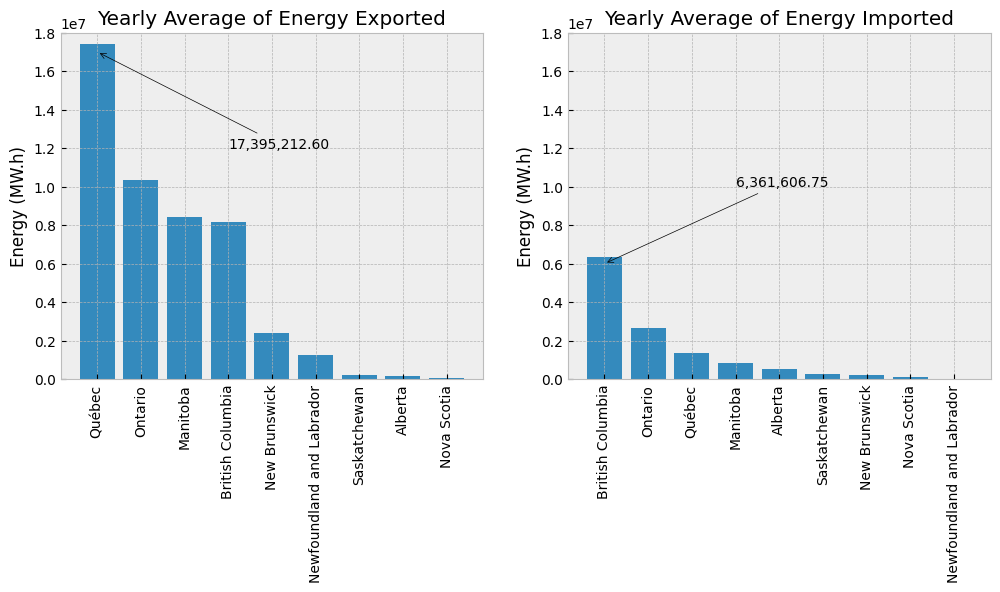

In [67]:
# Creating plots to show the amount of energy imported/exported from/to the US per province
plt.style.use('bmh')
# Using MEAN !!
exp_mean = []
imp_mean = []
for province in list_provinces:
    exp_mean.append(exp_groupby.loc[province, 'Energy (MW.h)'].mean())
    imp_mean.append(imp_groupby.loc[province, 'Energy (MW.h)'].mean())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Exportations':exp_mean,
    'Importations':imp_mean
})
final_df = final_df.sort_values('Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))
    
ax[0].bar(final_df['Province'], final_df['Exportations'])
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Energy (MW.h)')
ax[0].set_title('Yearly Average of Energy Exported')
ax[0].set_ylim([0, 18000000])

final_df = final_df.sort_values('Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Importations'])
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Energy (MW.h)')
ax[1].set_title('Yearly Average of Energy Imported')
ax[1].set_ylim([0, 18000000])

ax[0].annotate('17,395,212.60', xy=(0,17000000), xytext=(3,12000000), 
             arrowprops={"arrowstyle":"->","color":"black"})
ax[1].annotate('6,361,606.75', xy=(0,6000000), xytext=(3,10000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

plt.show()

In [70]:
# Dataframe with values from the graph above
print('Yearly Average of Energy Exported/Imported')
display(final_df)

Yearly Average of Energy Exported/Imported


,Province,Exportations,Importations
3,British Columbia,7964788.32,7029740.55
1,Ontario,10489034.76,851402.47
4,Québec,17006290.58,637240.00
2,Manitoba,9217412.66,462989.50
6,Alberta,130888.00,451727.00
5,Saskatchewan,137198.90,115439.00
0,New Brunswick,2084260.08,80102.50
7,Nova Scotia,29817.00,59374.50
8,Newfoundland and Labrador,1278571.32,2709.50


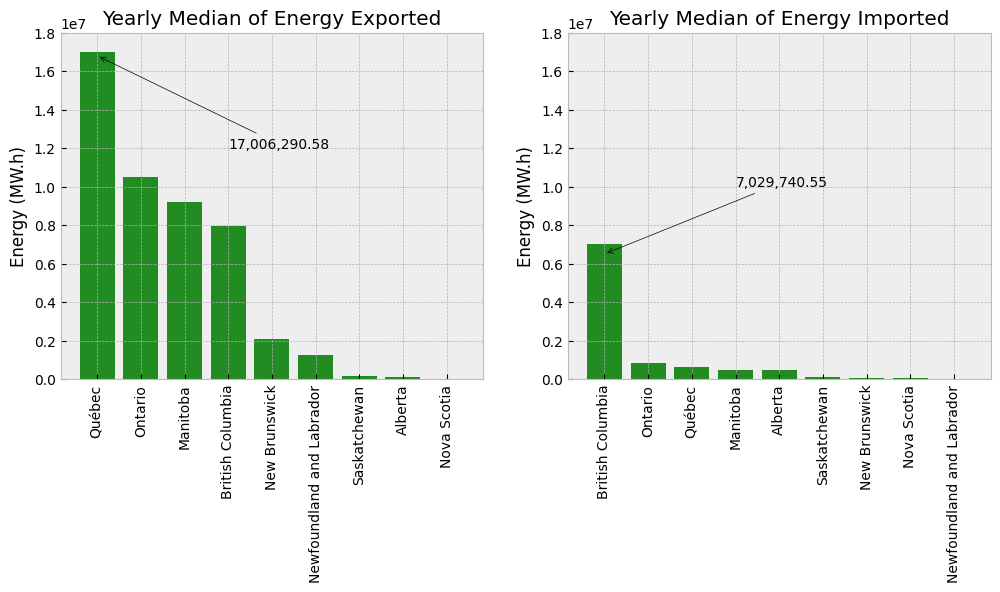

In [69]:
# Creating plots to show the amount of energy imported/exported from/to the US per province

# Using MEDIAN !!
exp_mean = []
imp_mean = []
for province in list_provinces:
    exp_mean.append(exp_groupby.loc[province, 'Energy (MW.h)'].median())
    imp_mean.append(imp_groupby.loc[province, 'Energy (MW.h)'].median())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Exportations':exp_mean,
    'Importations':imp_mean
})
final_df = final_df.sort_values('Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))

ax[0].bar(final_df['Province'], final_df['Exportations'], color='forestgreen')
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Energy (MW.h)')
ax[0].set_title('Yearly Median of Energy Exported')
ax[0].set_ylim([0, 18000000])

final_df = final_df.sort_values('Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Importations'], color='forestgreen')
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Energy (MW.h)')
ax[1].set_title('Yearly Median of Energy Imported')
ax[1].set_ylim([0, 18000000])

ax[0].annotate('17,006,290.58', xy=(0,16800000), xytext=(3,12000000), 
             arrowprops={"arrowstyle":"->","color":"black"})
ax[1].annotate('7,029,740.55', xy=(0,6500000), xytext=(3,10000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

plt.show()

In [347]:
# Dataframe with values from the graph above
print('Median Amount of Energy Exported/Imported')
display(final_df)

Median Amount of Energy Exported/Imported


,Province,Exportations,Importations
3,British Columbia,7964788.32,7029740.55
1,Ontario,10489034.76,851402.47
4,Québec,17006290.58,637240.00
2,Manitoba,9217412.66,462989.50
6,Alberta,130888.00,451727.00
5,Saskatchewan,137198.90,115439.00
0,New Brunswick,2084260.08,80102.50
7,Nova Scotia,29817.00,59374.50
8,Newfoundland and Labrador,1278571.32,2709.50


In [75]:
# Creating two groupby dataframes with Importations and Exportations per Year
imp_groupby = df_imp.groupby(['Destination', 'Year']).mean(numeric_only=True)
exp_groupby = df_exp.groupby(['Source', 'Year']).mean(numeric_only=True)

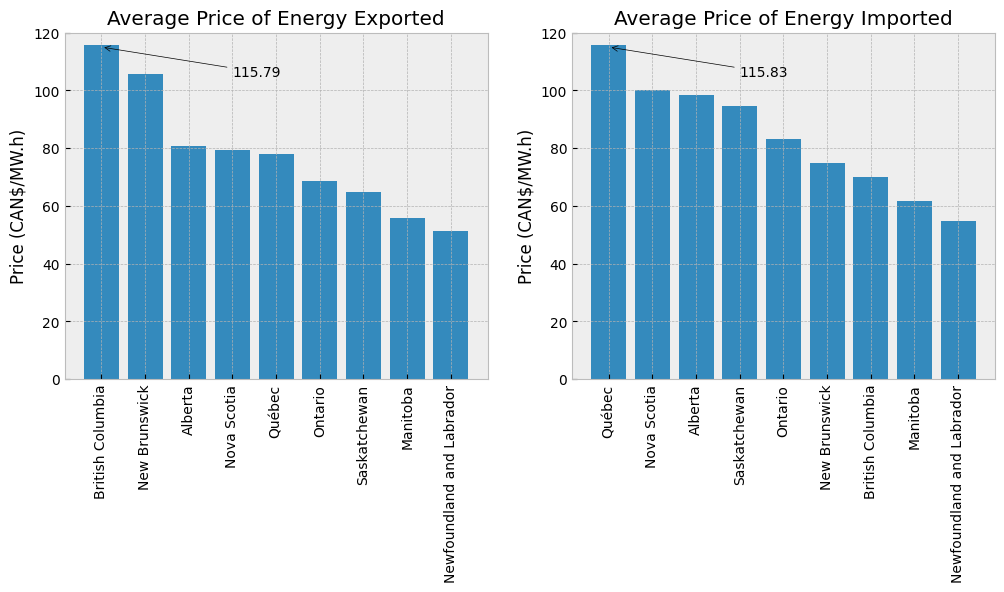

In [80]:
# Creating plots to show the price paid for energy imported/exported from/to the US per province

# Using MEAN !!
price_exp_mean = []
price_imp_mean = []
for province in list_provinces:
    price_exp_mean.append(exp_groupby.loc[province, 'Price (CAN$/MW.h)'].mean())
    price_imp_mean.append(imp_groupby.loc[province, 'Price (CAN$/MW.h)'].mean())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Price of Exportations':price_exp_mean,
    'Price of Importations':price_imp_mean
})
final_df = final_df.sort_values('Price of Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))

ax[0].bar(final_df['Province'], final_df['Price of Exportations'])
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Price (CAN$/MW.h)')
ax[0].set_title('Average Price of Energy Exported')
ax[0].set_ylim([0, 120])

final_df = final_df.sort_values('Price of Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Price of Importations'])
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Price (CAN$/MW.h)')
ax[1].set_title('Average Price of Energy Imported')
ax[1].set_ylim([0, 120])

ax[0].annotate('115.79', xy=(0,115), xytext=(3,105), 
             arrowprops={"arrowstyle":"->","color":"black"})
ax[1].annotate('115.83', xy=(0,115), xytext=(3,105), 
             arrowprops={"arrowstyle":"->","color":"black"})

plt.show()

In [77]:
# Dataframe with values from the graph above
print('Average Price of Energy Exported/Imported')
display(final_df)

Average Price of Energy Exported/Imported


,Province,Price of Exportations,Price of Importations
4,Québec,78.05,115.83
7,Nova Scotia,79.22,100.19
6,Alberta,80.90,98.38
5,Saskatchewan,64.98,94.48
1,Ontario,68.52,83.15
0,New Brunswick,105.66,74.96
3,British Columbia,115.79,70.11
2,Manitoba,55.80,61.53
8,Newfoundland and Labrador,51.20,54.62


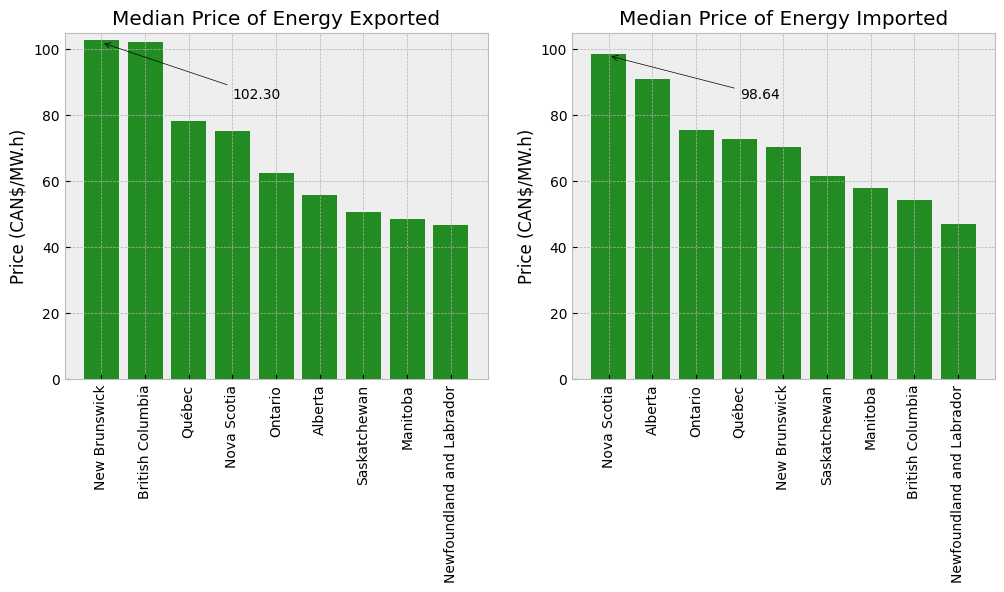

In [84]:
# Creating plots to show the price paid for energy imported/exported from/to the US per province

# Using MEDIAN !!
price_exp_mean = []
price_imp_mean = []
for province in list_provinces:
    price_exp_mean.append(exp_groupby.loc[province, 'Price (CAN$/MW.h)'].median())
    price_imp_mean.append(imp_groupby.loc[province, 'Price (CAN$/MW.h)'].median())
final_df = pd.DataFrame({
    'Province':list_provinces,
    'Price of Exportations':price_exp_mean,
    'Price of Importations':price_imp_mean
})
final_df = final_df.sort_values('Price of Exportations', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(12, 4.5))

ax[0].bar(final_df['Province'], final_df['Price of Exportations'], color='forestgreen')
ax[0].set_xticks(range(len(final_df)))
ax[0].set_xticklabels(final_df['Province'], rotation=90)
ax[0].set_ylabel('Price (CAN$/MW.h)')
ax[0].set_title('Median Price of Energy Exported')
ax[0].set_ylim([0, 105])

final_df = final_df.sort_values('Price of Importations', ascending=False)

ax[1].bar(final_df['Province'], final_df['Price of Importations'], color='forestgreen')
ax[1].set_xticks(range(len(final_df)))
ax[1].set_xticklabels(final_df['Province'], rotation=90)
ax[1].set_ylabel('Price (CAN$/MW.h)')
ax[1].set_title('Median Price of Energy Imported')
ax[1].set_ylim([0, 105])

ax[0].annotate('102.30', xy=(0,102), xytext=(3,85), 
             arrowprops={"arrowstyle":"->","color":"black"})
ax[1].annotate('98.64', xy=(0,98), xytext=(3,85), 
             arrowprops={"arrowstyle":"->","color":"black"})

plt.show()

In [82]:
# Dataframe with values from the graph above
print('Median Price of Energy Exported/Imported')
display(final_df)

Median Price of Energy Exported/Imported


,Province,Price of Exportations,Price of Importations
7,Nova Scotia,75.11,98.64
6,Alberta,55.78,90.96
1,Ontario,62.52,75.63
4,Québec,78.12,72.78
0,New Brunswick,102.64,70.30
5,Saskatchewan,50.63,61.66
2,Manitoba,48.42,58.01
3,British Columbia,102.30,54.18
8,Newfoundland and Labrador,46.63,47.12


### CREATING A DATAFRAME FOR PROFITS

In [87]:
# Creating two groupby dataframes with Importations and Exportations per Year
imp_groupby = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
exp_groupby = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)

In [88]:
# Creatinga a list with the name of the Provinces
list_provinces = list(df_imp['Destination'].unique())
# Creating an empty dataframe to insert the profits per province and year
profit_df = pd.DataFrame()
# Runing through the all the provinces
for province in list_provinces:
    # Calculating the profit per province
    cur_df = exp_groupby.loc[province] - imp_groupby.loc[province]
    # Adding the profit of the current Province to the Dataframe
    profit_df = profit_df.merge(cur_df[['Total Value (CAN$)']].rename(columns={'Total Value (CAN$)': f'{province}'}), how='outer', right_index=True, left_index=True)
# Grouping the least profitable Provinces into 'Others' category
list_big_profits = list(profit_df.sum().sort_values(ascending=False).head(5).index)
list_big_profits.append('Others')
# Creating the column 'Others' in the profit dataframe
profit_df['Others'] = profit_df.iloc[:, 5:].sum(axis=1)

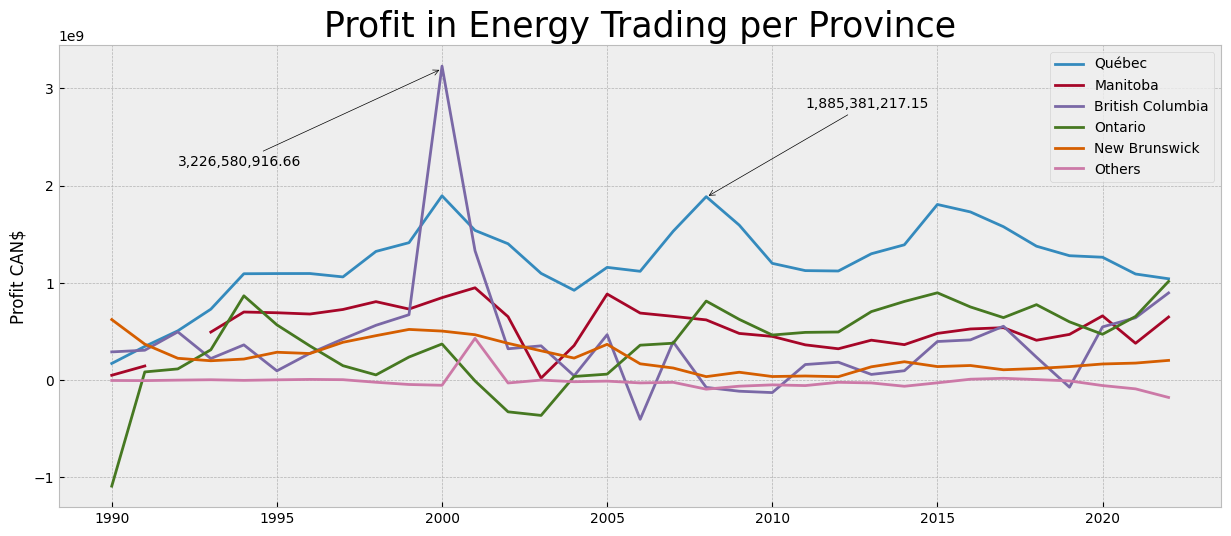

In [89]:
# Plotting a line graph of profits with energy trading considering the trades with US

fig, ax = plt.subplots(figsize=(15, 6))
for province in list_big_profits:
    ax.plot(profit_df[f'{province}'])    
    ax.legend(labels=list_big_profits)    
ax.set_ylabel('Profit CAN$')
ax.set_title('Profit in Energy Trading per Province', fontsize=25)

ax.annotate('3,226,580,916.66', xy=(2000,3200000000), xytext=(1992,2200000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

ax.annotate('1,885,381,217.15', xy=(2008,1880000000), xytext=(2011,2800000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

plt.show()

In [90]:
# Dataframe with values from the graph above
print('Profit in Energy Trading per Province')
display(profit_df.sum(axis=0))
display(profit_df)

Profit in Energy Trading per Province


New Brunswick                7849652219.35
Ontario                     12363510465.91
Manitoba                    17197322690.18
British Columbia            13230880624.49
Québec                      40267496222.13
Saskatchewan                   -6962592.73
Alberta                      -568175466.57
Nova Scotia                  -104124104.45
Newfoundland and Labrador     189921209.64
Others                       -489340954.11
dtype: float64

,New Brunswick,Ontario,Manitoba,British Columbia,Québec,Saskatchewan,Alberta,Nova Scotia,Newfoundland and Labrador,Others
Year,,,,,,,,,,
1990,622083187.69,-1089427412.48,49911345.08,289979638.07,171175987.42,-3535705.98,NaN,NaN,NaN,-3535705.98
1991,369567957.74,84137152.87,145291508.57,307286734.12,346191181.42,-4955540.59,NaN,NaN,NaN,-4955540.59
1992,224385511.32,115247653.10,NaN,495828366.65,506640350.97,21954.42,NaN,NaN,NaN,21954.42
1993,199002969.83,311749029.18,493718995.57,221743340.92,729108289.11,3919594.94,NaN,NaN,NaN,3919594.94
1994,216552891.22,866448396.52,699897424.70,362251770.93,1093242905.90,-2373061.14,NaN,NaN,NaN,-2373061.14
1995,286380270.93,568042838.90,692358314.66,95635269.27,1094989822.77,3109063.83,NaN,NaN,NaN,3109063.83
1996,273385938.70,351594747.07,679245277.16,275297198.91,1095428794.10,6741967.68,538857.19,NaN,NaN,7280824.86
1997,388794606.52,148431209.70,725952042.27,422646540.66,1060611397.02,-614839.39,5173580.84,NaN,NaN,4558741.45
1998,456902428.53,53637731.60,806478215.05,563419987.18,1322605047.43,-13632031.23,-8332222.59,NaN,NaN,-21964253.82


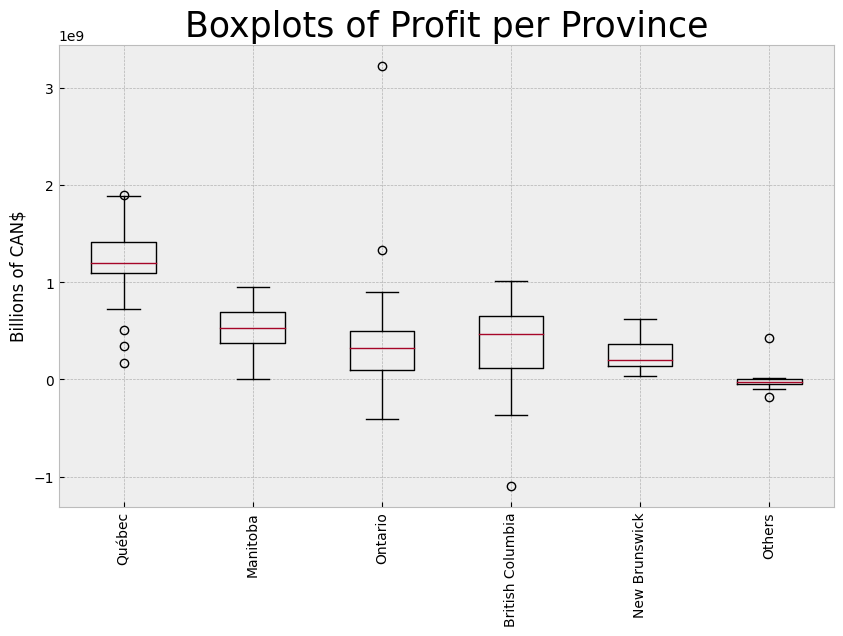

In [91]:
# Plotting a boxplot graph with the profit per province considering the energy trades with US

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.boxplot(profit_df[list_big_profits].fillna(0))
ax.set_xticklabels(['Québec', 'Manitoba', 'Ontario', 'British Columbia', 'New Brunswick', 'Others'], rotation=90)
ax.set_title('Boxplots of Profit per Province', fontsize=25)
ax.set_ylabel('Billions of CAN$')
plt.show()

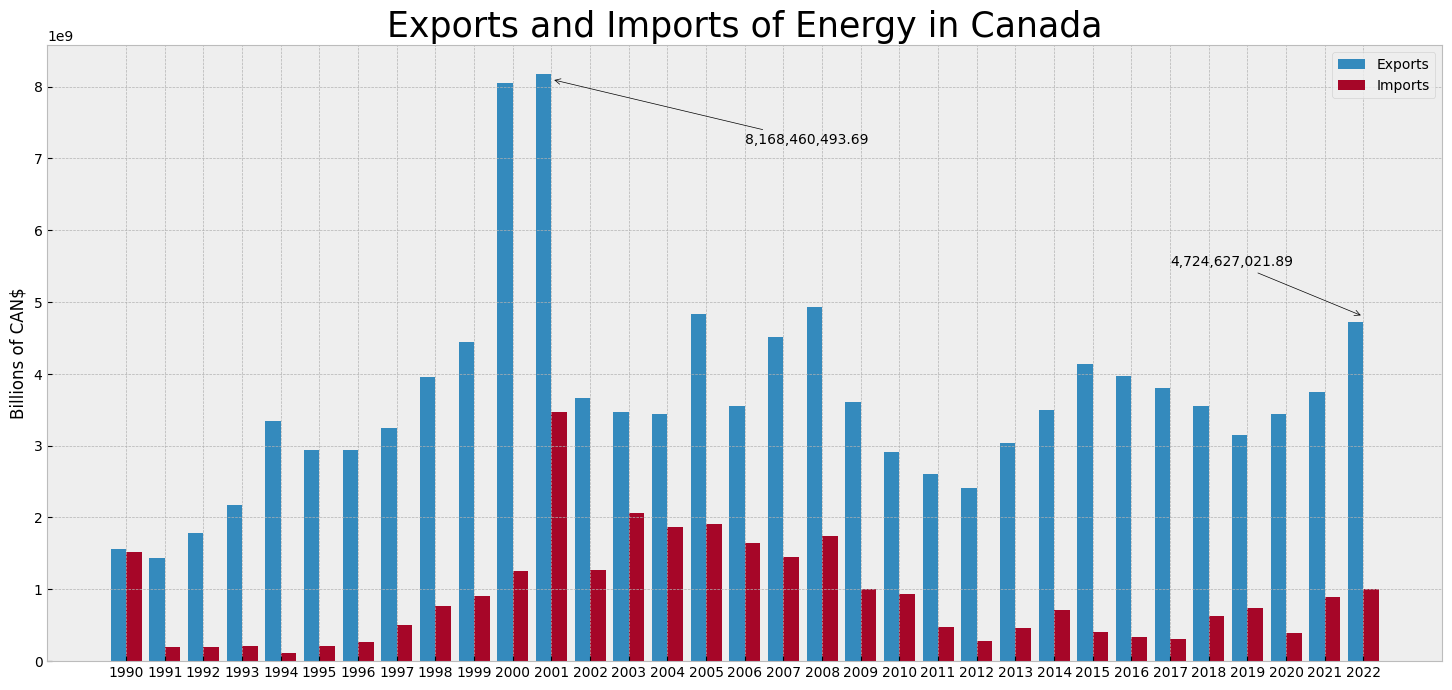

In [92]:
# Plotting a bar graph of total of CAN$ in energy traded with US

trade = ("Exports", "Imports")
export_totals = df_exp.groupby('Year')['Total Value (CAN$)'].sum()
import_totals = df_imp.groupby('Year')['Total Value (CAN$)'].sum()

x = np.arange(len(export_totals))
width = 0.4
fig, ax  = plt.subplots(figsize=(18,8))
# plot data in grouped manner of bar type
ax.bar(x-0.2, export_totals, width)
ax.bar(x+0.2, import_totals, width)
ax.set_xticks(x)
ax.set_xticklabels(range(1990, 2023))
ax.set_title('Exports and Imports of Energy in Canada', fontsize=25)
ax.set_ylabel('Billions of CAN$')
plt.legend(trade)

ax.annotate('8,168,460,493.69', xy=(11,8100000000), xytext=(16,7200000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

ax.annotate('4,724,627,021.89', xy=(32,4800000000), xytext=(27,5500000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

plt.show()

In [357]:
# Dataframe with values from the graph above
print('Exports and Imports per year in CAN$')
dic = {'Exports': export_totals,
       'Imports': import_totals}
pd.DataFrame(dic)

Exports and Imports per year in CAN$


,Exports,Imports
Year,,
1990,1559059451.14,1519187854.38
1991,1438672541.71,191438352.68
1992,1785383054.79,198853045.90
1993,2173415929.35,214468564.19
1994,3346296567.31,110636044.83
1995,2944234692.44,204043671.39
1996,2943658845.23,261426064.43
1997,3252729714.29,501735176.67
1998,3952337033.85,771257877.88


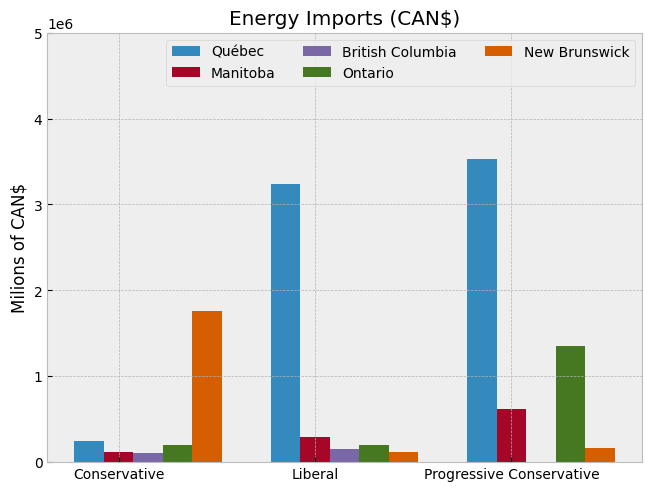

In [358]:
# Plotting a bar graph of energy imported from the US divided by the Prime Minister's Political Party

dic_p = {}
for province in list_big_profits:
    p1 = df_imp[(df_imp['Political Party'] == 'Conservative') & (df_imp['Destination'] == f'{province}')]['Total Value (CAN$)'].median()
    p2 = df_imp[(df_imp['Political Party'] == 'Liberal') & (df_imp['Destination'] == f'{province}')]['Total Value (CAN$)'].median()
    p3 = df_imp[(df_imp['Political Party'] == 'Progressive Conservative') & (df_imp['Destination'] == f'{province}')]['Total Value (CAN$)'].median()

    dic_p[f'{province}'] = [p1, p2, p3]
dic_p.pop('Others')
parties = ('Conservative', 'Liberal', 'Progressive Conservative')

x = np.arange(len(parties))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for prov, prov_median in dic_p.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, prov_median, width, label=prov)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Milions of CAN$')
ax.set_title('Energy Imports (CAN$)')
ax.set_xticks(x + width, parties)
ax.legend(ncols=3)
ax.set_ylim(0, 5000000)

plt.show()

In [359]:
# Dataframe with values from the graph above
pd.DataFrame(dic_p, index=['Conservative', 'Liberal', 'Progressive Conservative'])

,Québec,Manitoba,British Columbia,Ontario,New Brunswick
Conservative,245585.23,114574.77,101952.07,203495.97,1758725.29
Liberal,3241146.70,290562.56,156306.28,195560.82,119830.67
Progressive Conservative,3533174.74,619681.46,1698.95,1350796.13,165545.00


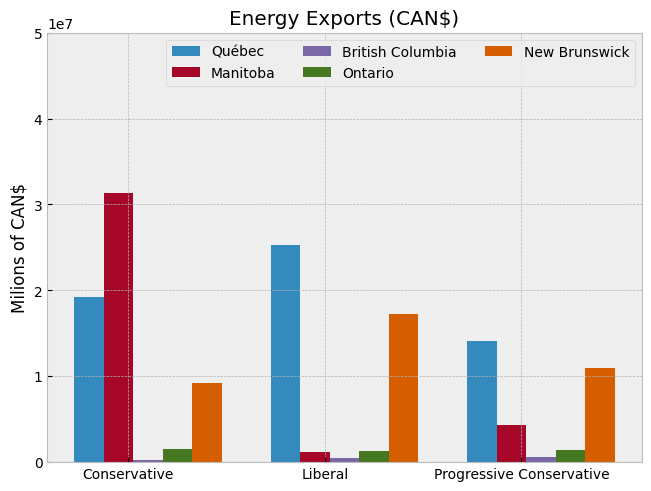

In [360]:
# Plotting a bar graph of energy exported to the US divided by the Prime Minister's Political Party

dic_p = {}
for province in list_big_profits:
    p1 = df_exp[(df_exp['Political Party'] == 'Conservative') & (df_exp['Source'] == f'{province}')]['Total Value (CAN$)'].median()
    p2 = df_exp[(df_exp['Political Party'] == 'Liberal') & (df_exp['Source'] == f'{province}')]['Total Value (CAN$)'].median()
    p3 = df_exp[(df_exp['Political Party'] == 'Progressive Conservative') & (df_exp['Source'] == f'{province}')]['Total Value (CAN$)'].median()

    dic_p[f'{province}'] = [p1, p2, p3]
dic_p.pop('Others')
parties = ('Conservative', 'Liberal', 'Progressive Conservative')

x = np.arange(len(parties))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for prov, prov_median in dic_p.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, prov_median, width, label=prov)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Milions of CAN$')
ax.set_title('Energy Exports (CAN$)')
ax.set_xticks(x + 0.2, parties)
ax.legend(ncols=3)
ax.set_ylim(0, 50000000)

plt.show()

In [361]:
# Dataframe with values from the graph above
pd.DataFrame(dic_p, index=['Conservative', 'Liberal', 'Progressive Conservative'])

,Québec,Manitoba,British Columbia,Ontario,New Brunswick
Conservative,19230422.40,31385754.18,210188.12,1517383.85,9228808.57
Liberal,25252319.45,1219133.65,456760.04,1262254.06,17254492.18
Progressive Conservative,14066101.97,4326349.12,577601.11,1365129.29,10969208.04


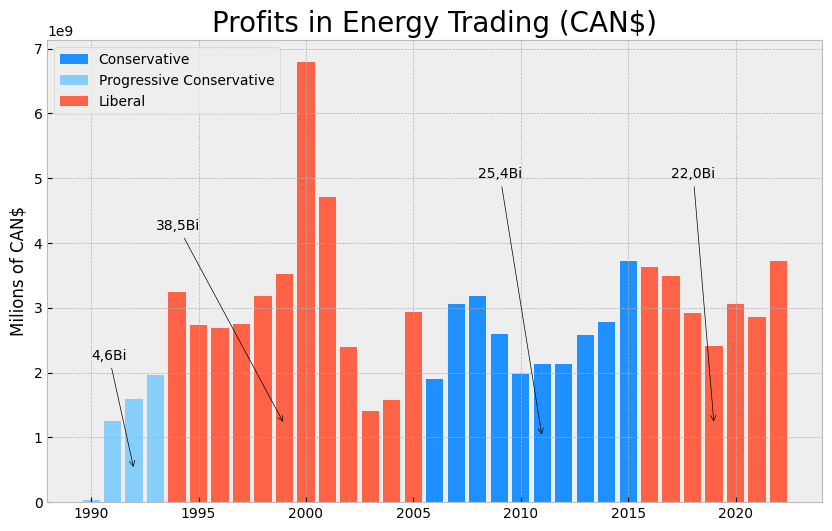

In [362]:
# Plotting a bar graph of Profits in energy trading with the US segmented by the Prime Minister's Political Party 

fig, ax = plt.subplots(figsize=(10, 6))
profit = df_exp.groupby(['Political Party', 'Year']).sum(numeric_only=True) - df_imp.groupby(['Political Party', 'Year']).sum(numeric_only=True)
ax.bar(profit.loc['Conservative'].index, profit.loc['Conservative']['Total Value (CAN$)'], color='dodgerblue')
ax.bar(profit.loc['Progressive Conservative'].index, profit.loc['Progressive Conservative']['Total Value (CAN$)'], color='lightskyblue')
ax.bar(profit.loc['Liberal'].index, profit.loc['Liberal']['Total Value (CAN$)'], color='tomato')

# Setting the profit for the transition years
ax.bar(1993, profit.loc['Progressive Conservative', 1993]['Total Value (CAN$)']+profit.loc['Liberal', 1993]['Total Value (CAN$)'], color='lightskyblue')
ax.bar(2006, profit.loc['Liberal', 2006]['Total Value (CAN$)']+profit.loc['Conservative', 2006]['Total Value (CAN$)'], color='dodgerblue')
ax.bar(2015, profit.loc['Conservative', 2015]['Total Value (CAN$)']+profit.loc['Liberal', 2015]['Total Value (CAN$)'], color='dodgerblue')

ax.set_ylabel('Milions of CAN$')
ax.set_title('Profits in Energy Trading (CAN$)', fontsize=20)
plt.legend(['Conservative', 'Progressive Conservative', 'Liberal'], loc='upper left')

ax.annotate('4,6Bi', xy=(1992,500000000), xytext=(1990,2200000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

ax.annotate('25,4Bi', xy=(2011,1000000000), xytext=(2008,5000000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

ax.annotate('38,5Bi', xy=(1999,1200000000), xytext=(1993,4200000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

ax.annotate('22,0Bi', xy=(2019,1200000000), xytext=(2017,5000000000), 
             arrowprops={"arrowstyle":"->","color":"black"})

plt.show()

In [363]:
# Dataframe with values from the graph above
#print("Profit in energy trading by prime minister's political party")
#print(profit)

x = profit.loc['Progressive Conservative']
print(x['Total Value (CAN$)'].sum())

x = profit.loc['Conservative']
print(x['Total Value (CAN$)'].sum())

x = profit.loc['Liberal']
print(x.loc[1993:2006,'Total Value (CAN$)'].sum())
print(x.loc[2016:2022,'Total Value (CAN$)'].sum())

4618361952.095245
25416605249.517834
38500130814.31076
22068246869.502163


In [364]:
# Creating the variables to support the next graph
df_pp = df_imp[['Destination', 'Year', 'Province Power Plants']].rename(columns={'Destination':'Province'})
periods_of_governments = ['Progressive Conservative', 'Liberal 1994', 'Conservative', 'Liberal 2015']
dic = {}
for province in list_provinces:
    p1 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 1994)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 1990)]['Province Power Plants'].min()
    p2 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2006)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 1994)]['Province Power Plants'].min()
    p3 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2015)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2006)]['Province Power Plants'].min()
    p4 = df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2022)]['Province Power Plants'].min() - df_pp[(df_pp['Province'] == f'{province}') & (df_pp['Year'] == 2015)]['Province Power Plants'].max()
    dic[f'{province}'] = [p1, p2, p3, p4]

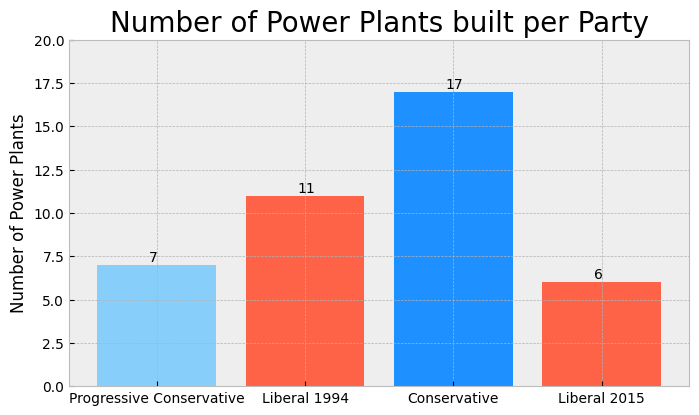

In [365]:
# Plotting a bar graph with the amount of power plants built per political party

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.bar(pd.DataFrame(dic, index=periods_of_governments).index, pd.DataFrame(dic, index=periods_of_governments).sum(axis=1),
      color=['lightskyblue', 'tomato', 'dodgerblue', 'tomato'])
for i, v in enumerate(pd.DataFrame(dic, index=periods_of_governments).sum(axis=1)):
    ax.text(i - 0.05, v + 0.2, str(int(v)), color='black')
ax.set_title('Number of Power Plants built per Party', fontsize=20)
ax.set_ylabel('Number of Power Plants')
ax.set_ylim([0, 20])
plt.show()

In [366]:
# Creating two groupby dataframes with Importations and Exportations per Period
imp_groupby = df_imp.groupby(['Destination', 'Period']).sum(numeric_only=True)
exp_groupby = df_exp.groupby(['Source', 'Period']).sum(numeric_only=True)

# Creatinga a list with the name of the Provinces
list_provinces = list(df_imp['Destination'].unique())
# Creating an empty dataframe to insert the profits per province and year
profit_df = pd.DataFrame()
# Runing through the all the provinces
for province in list_provinces:
    # Calculating the profit per province
    cur_df = exp_groupby.loc[province] - imp_groupby.loc[province]
    # Adding the profit of the current Province to the Dataframe
    profit_df = profit_df.merge(cur_df[['Total Value (CAN$)']].rename(columns={'Total Value (CAN$)': f'{province}'}), how='outer', right_index=True, left_index=True)
# Grouping the least profitable Provinces into 'Others' category
list_big_profits = list(profit_df.sum().sort_values(ascending=False).head(5).index)
list_big_profits.append('Others')
# Creating the column 'Others' in the profit dataframe
profit_df['Others'] = profit_df.iloc[:, 5:].sum(axis=1)

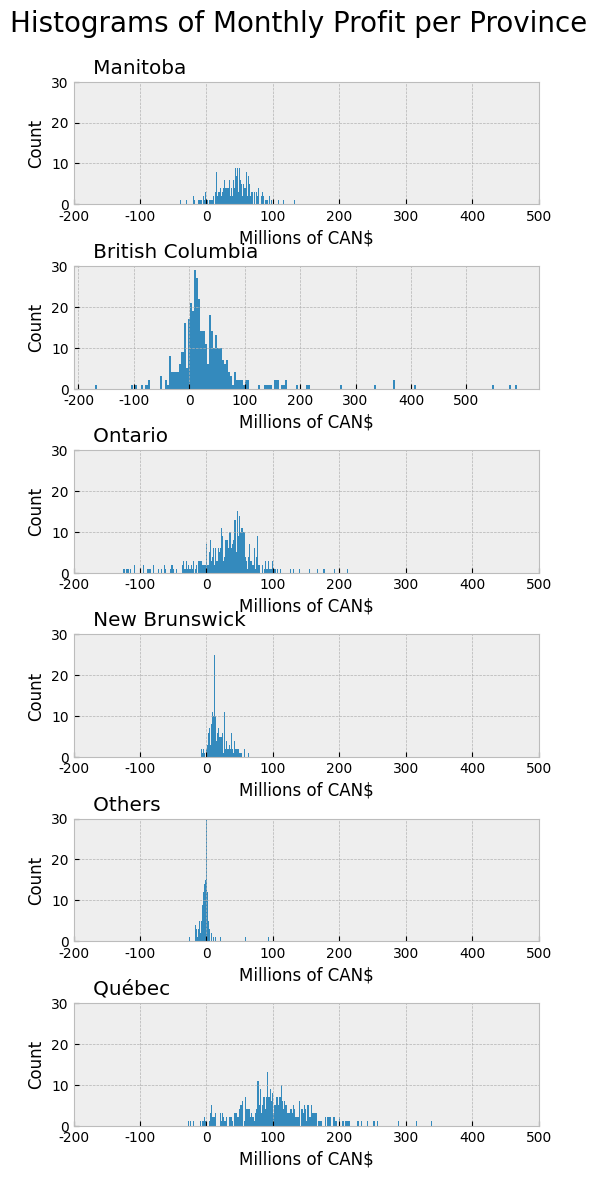

In [367]:
# Plotting histograms about the Monthly Profit of each province in energy tradings with US

fig, ax = plt.subplots(6,1, figsize=(6,12))
fig.subplots_adjust(hspace=0.5, top=0.92, bottom=0.05)
for y, province in enumerate(list_big_profits):
    y = y-1
    ax[y].hist(profit_df[f'{province}'], bins=200)
    ax[y].set_title(f'   {province}', loc='left')
    ax[y].set_xticks(range(-200000000,600000000,100000000))
    ax[y].set_xticklabels(['-200', '-100', '0', '100', '200', '300', '400', '500'])
    ax[y].set_ylim([0, 30])
    ax[y].set_ylabel('Count')
    ax[y].set_xlabel('Millions of CAN$')
fig.suptitle('Histograms of Monthly Profit per Province', fontsize=20)
plt.show(block=False)

In [368]:
# Creating groupby dataframes again to support the creation of the next graph
exp_groupby_year_source = df_exp.groupby(['Year', 'Source']).sum(numeric_only=True)
imp_groupby_year_source = df_imp.groupby(['Year', 'Destination']).sum(numeric_only=True)

In [369]:
# Creating the dataframes to support the next plot
dic = {}
for year in list(range(1990,2023)):
    dic[f'{year}'] = exp_groupby_year_source.loc[year].corr()['Energy (MW.h)']
mean_corr_exp = pd.DataFrame(dic).drop('Energy (MW.h)').mean(axis=1)
median_corr_exp = pd.DataFrame(dic).drop('Energy (MW.h)').median(axis=1)

dic = {}
for year in list(range(1990,2023)):
    dic[f'{year}'] = imp_groupby_year_source.loc[year].corr()['Energy (MW.h)']
mean_corr_imp = pd.DataFrame(dic).drop('Energy (MW.h)').mean(axis=1)
median_corr_imp = pd.DataFrame(dic).drop('Energy (MW.h)').median(axis=1)

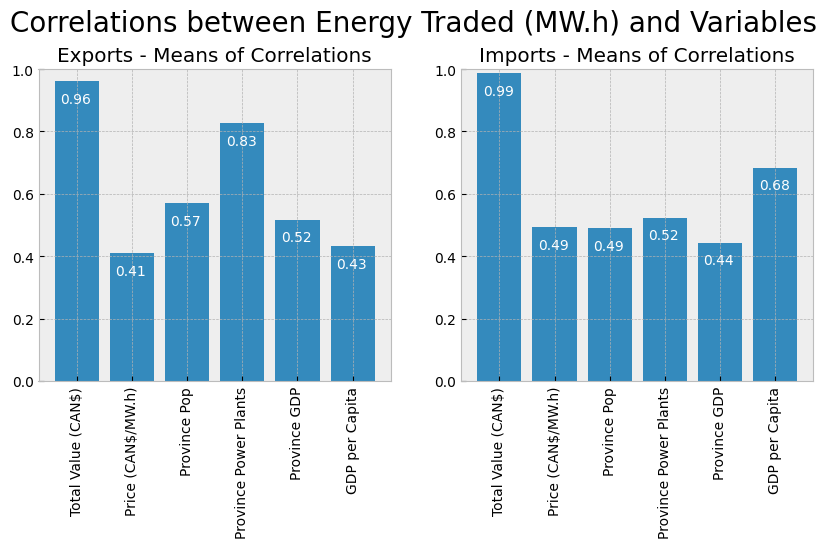

In [370]:
# Plotting a bar graph of the correlation between the Amount of Energy Traded and other variables
# It was used an average of the correlations of all the years

fig, ax = plt.subplots(1,2, figsize=(10,4))
fig.subplots_adjust(hspace=0.6, top=0.83, bottom=0.05)

ax[0].bar(list(median_corr_exp.index), median_corr_exp)
ax[0].set_xticks(range(len(median_corr_exp)))
ax[0].set_xticklabels(median_corr_exp.index, rotation=90)
ax[0].set_title('Exports - Means of Correlations')
ax[0].set_ylim([0,1])
for i, v in enumerate(median_corr_exp):
    ax[0].text(i - 0.3, v - 0.07, str(round(float(v), 2)), color='white')

ax[1].bar(list(median_corr_imp.index), median_corr_imp)
ax[1].set_xticks(range(len(median_corr_imp)))
ax[1].set_xticklabels(median_corr_imp.index, rotation=90)
ax[1].set_title('Imports - Means of Correlations')
ax[1].set_ylim([0,1])
for i, v in enumerate(median_corr_imp):
    ax[1].text(i - 0.3, v - 0.07, str(round(float(v), 2)), color='white')

fig.suptitle('Correlations between Energy Traded (MW.h) and Variables', fontsize=20)

plt.show()

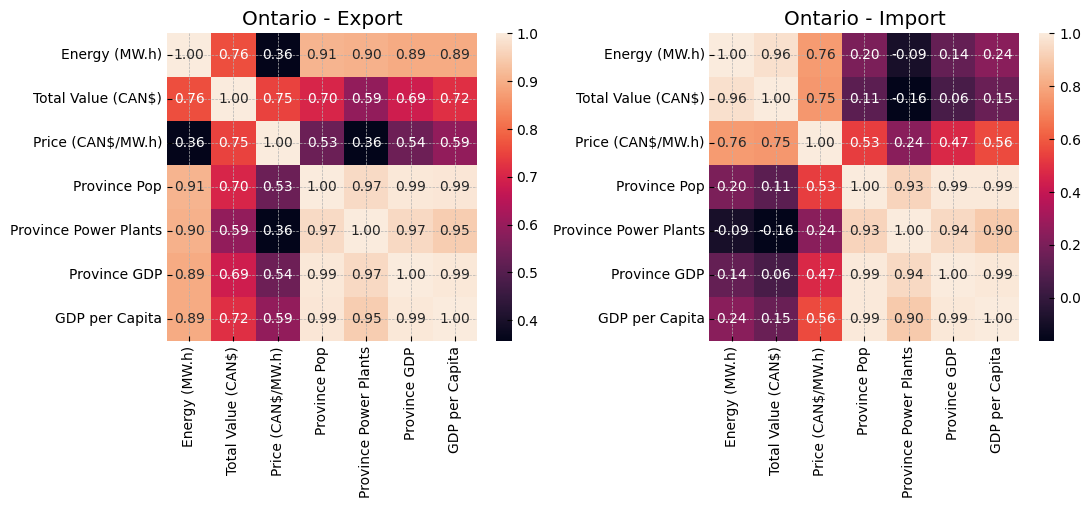

In [371]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['Ontario'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('Ontario - Export')

sns.heatmap(imp_groupby_source_year.loc['Ontario'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('Ontario - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

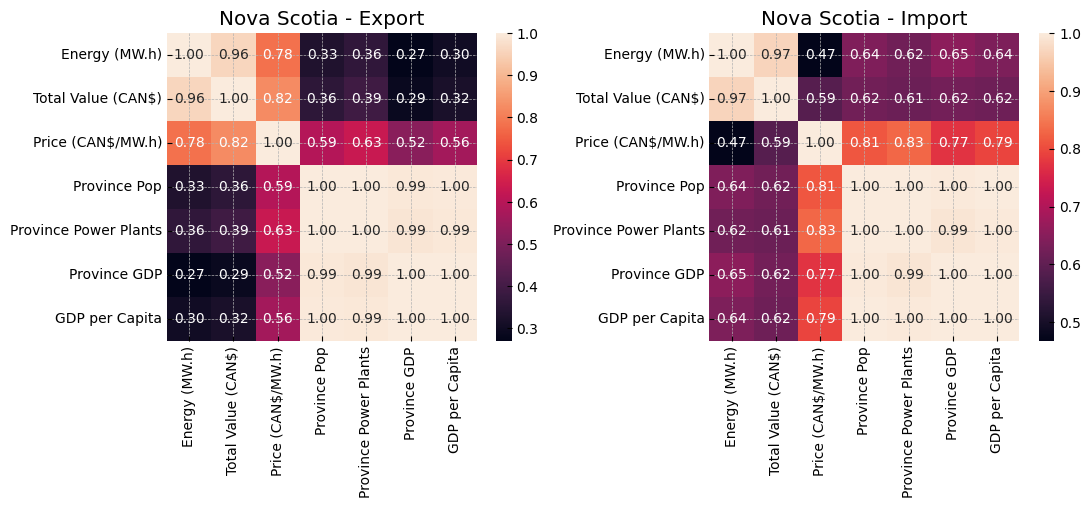

In [372]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['Nova Scotia'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('Nova Scotia - Export')

sns.heatmap(imp_groupby_source_year.loc['Nova Scotia'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('Nova Scotia - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

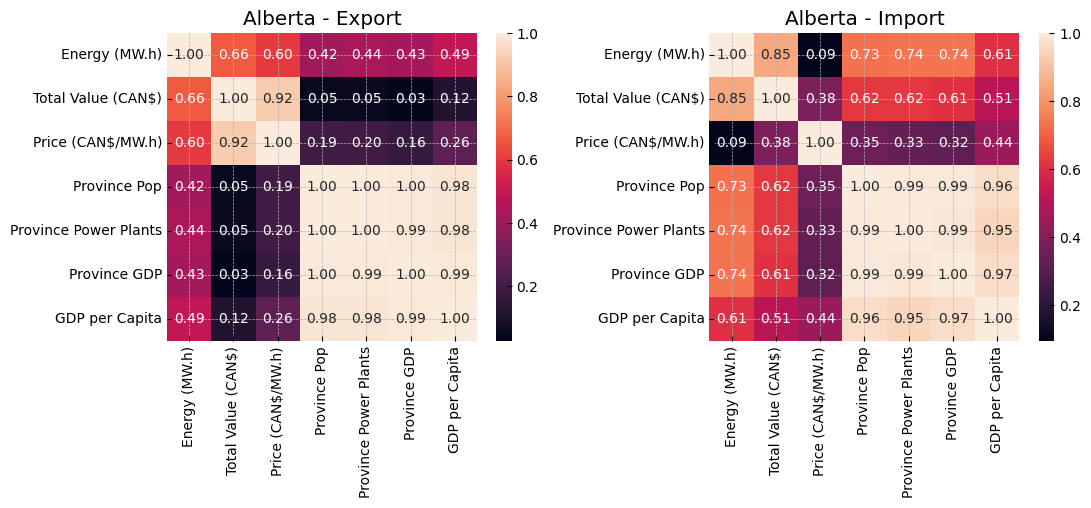

In [373]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['Alberta'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('Alberta - Export')

sns.heatmap(imp_groupby_source_year.loc['Alberta'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('Alberta - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

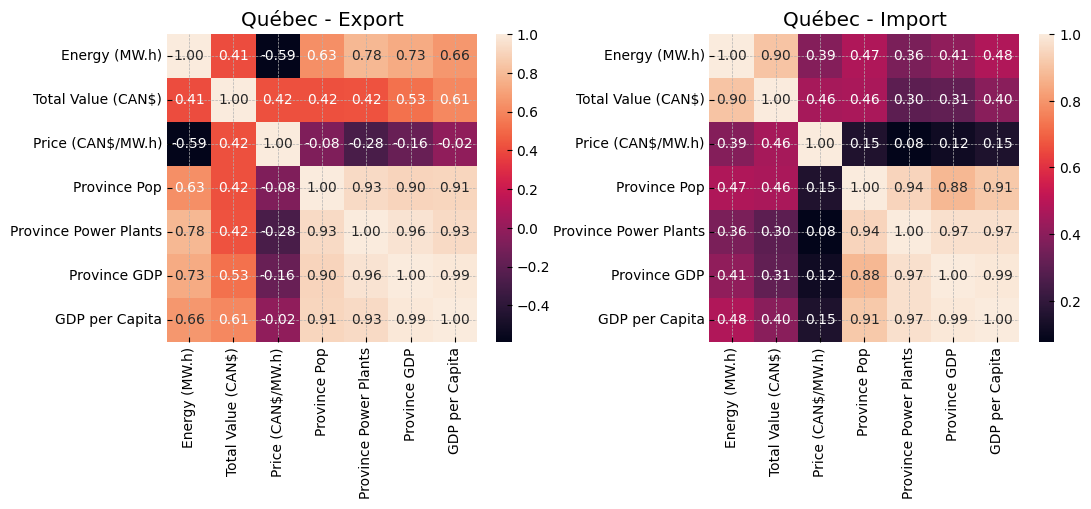

In [374]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['Québec'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('Québec - Export')

sns.heatmap(imp_groupby_source_year.loc['Québec'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('Québec - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

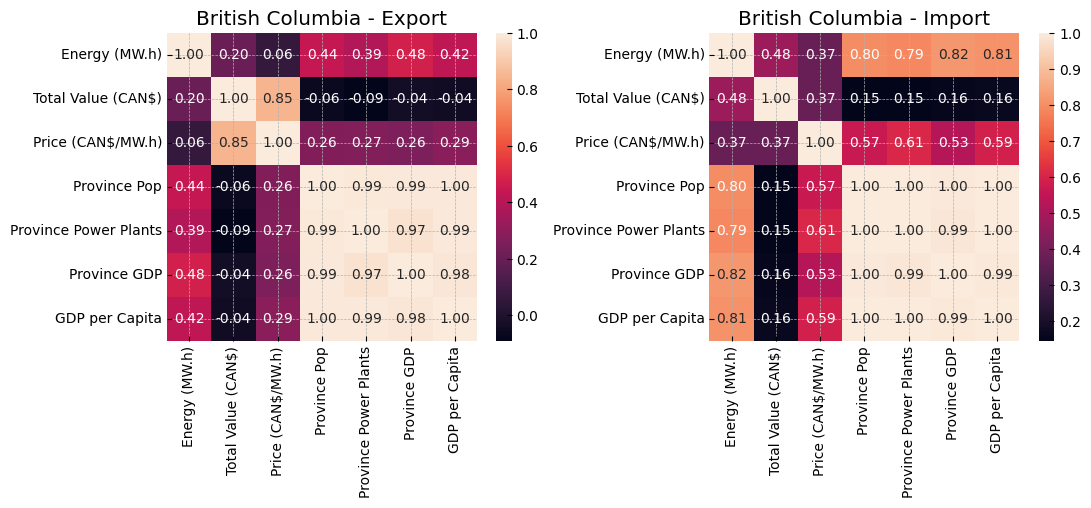

In [375]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['British Columbia'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('British Columbia - Export')

sns.heatmap(imp_groupby_source_year.loc['British Columbia'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('British Columbia - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

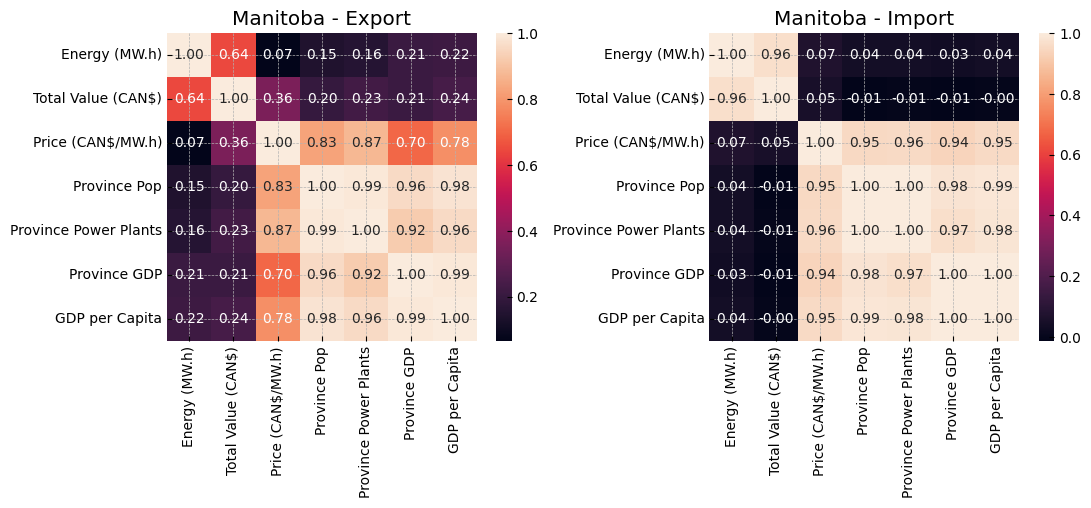

In [376]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['Manitoba'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('Manitoba - Export')

sns.heatmap(imp_groupby_source_year.loc['Manitoba'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('Manitoba - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

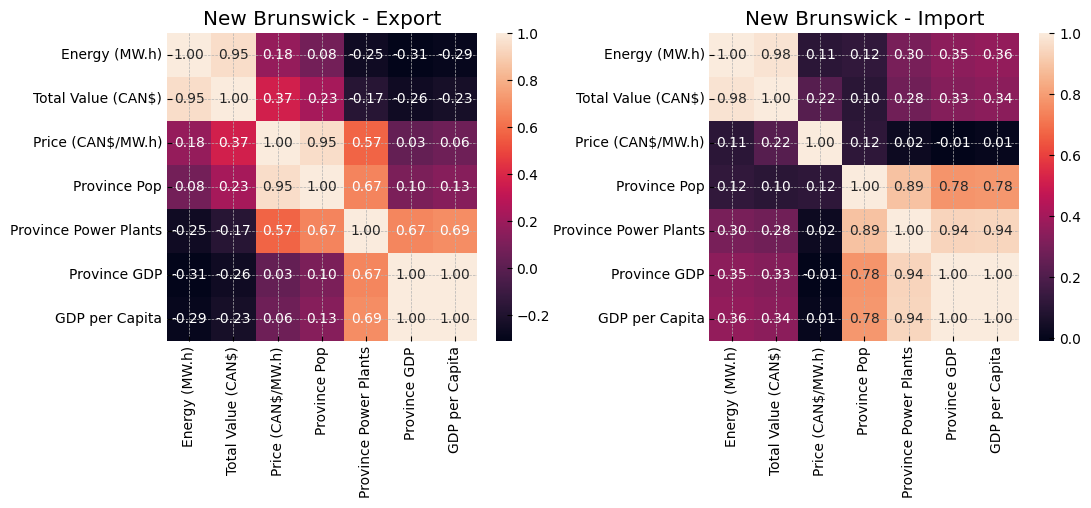

In [377]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['New Brunswick'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('New Brunswick - Export')

sns.heatmap(imp_groupby_source_year.loc['New Brunswick'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('New Brunswick - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

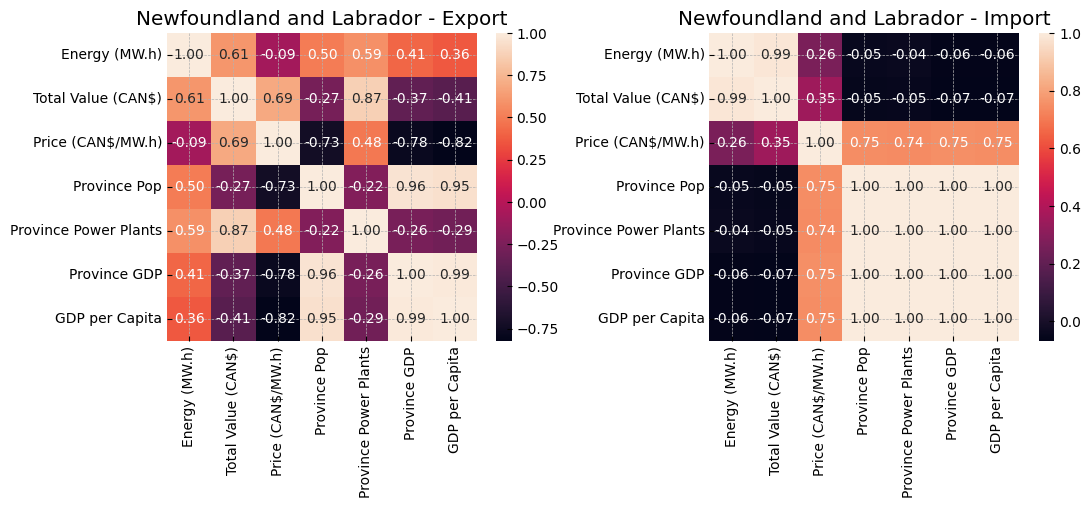

In [378]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['Newfoundland and Labrador'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('Newfoundland and Labrador - Export')

sns.heatmap(imp_groupby_source_year.loc['Newfoundland and Labrador'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('Newfoundland and Labrador - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

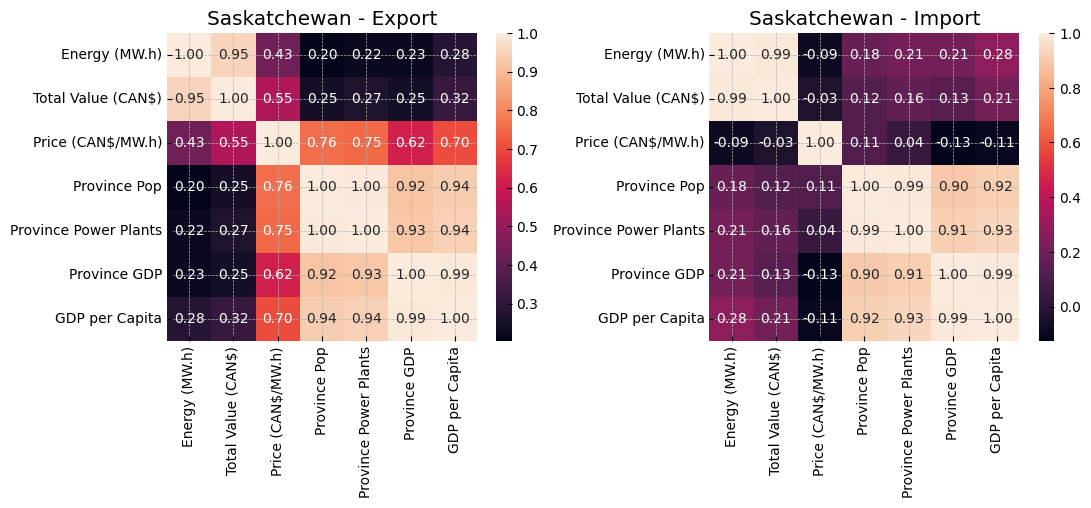

In [379]:
exp_groupby_source_year = df_exp.groupby(['Source', 'Year']).sum(numeric_only=True)
imp_groupby_source_year = df_imp.groupby(['Destination', 'Year']).sum(numeric_only=True)
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(exp_groupby_source_year.loc['Saskatchewan'].corr(), annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title('Saskatchewan - Export')

sns.heatmap(imp_groupby_source_year.loc['Saskatchewan'].corr(), annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title('Saskatchewan - Import')
plt.subplots_adjust(wspace=0.4)

plt.show()

Text(0.5, 1.0, 'Imports Variables Correlations')

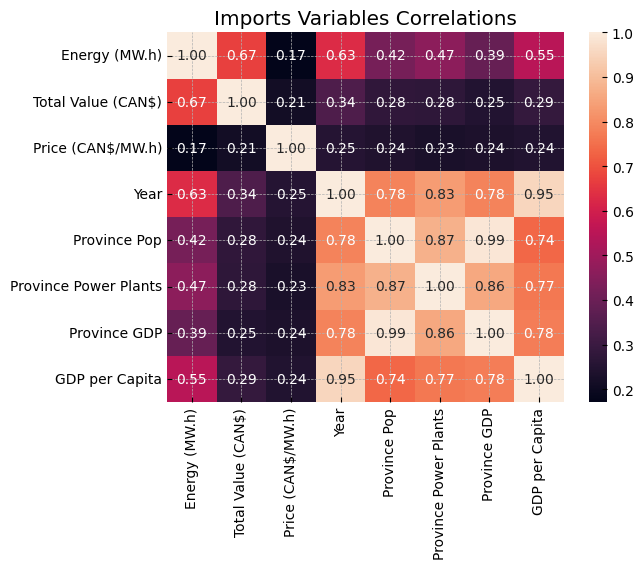

In [380]:
# Plotting a correlation matrix of energy imports variables segmented by Source
sns.heatmap(imp_groupby.corr(numeric_only=True), annot=True, fmt=".2f").set_title('Imports Variables Correlations')

Text(0.5, 1.0, 'Exports Variables Correlations')

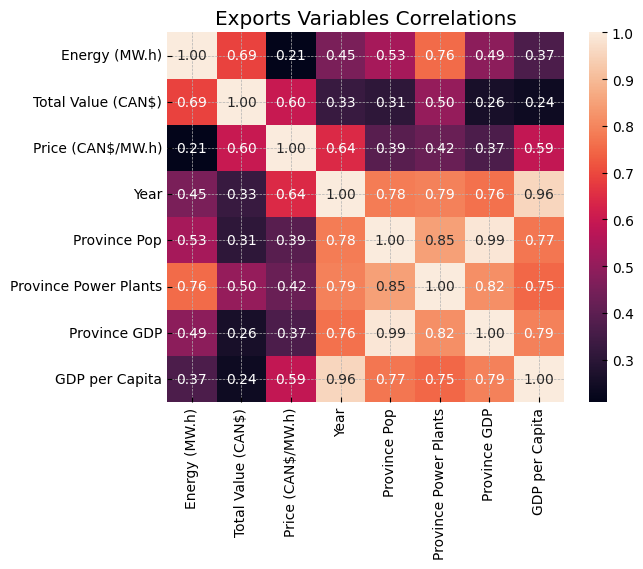

In [381]:
# Plotting a correlation matrix of energy imports variables segmented by Destination
sns.heatmap(exp_groupby.corr(numeric_only=True), annot=True, fmt=".2f").set_title('Exports Variables Correlations')

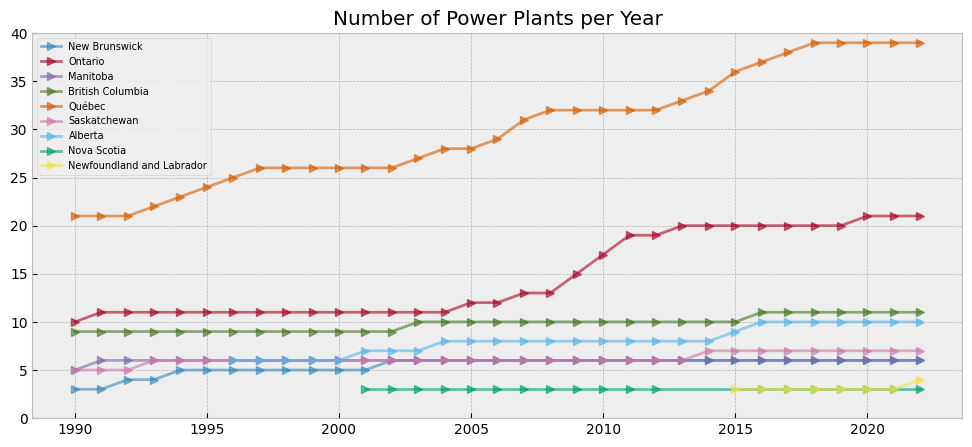

In [384]:
fig, ax = plt.subplots(figsize = (12,5))
for province in list_provinces:
    x = df_exp[df_exp['Source'] == f'{province}'].groupby('Year').median(numeric_only=True)
    ax.plot(x.index, x['Province Power Plants'], marker='>', label=f'{province}', alpha=0.6)
ax.set_ylim(0,40)
plt.legend(fontsize=7)
ax.set_title('Number of Power Plants per Year')
plt.show()